In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.read_csv('winequality.csv')
df.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,NaN,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,NaN,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,NaN,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,NaN,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
count,1599
unique,1359
top,7.2;0.36;0.46;2.1;0.074;24;44;0.99534;3.4;0.85...
freq,4


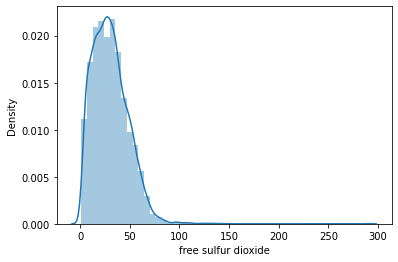

In [9]:
sns.distplot(df["free sulfur dioxide"])

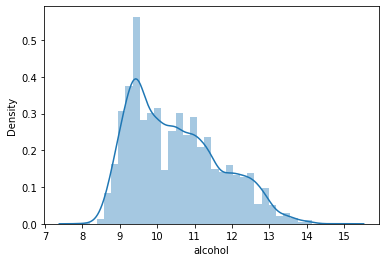

In [10]:
sns.distplot(df['alcohol'])

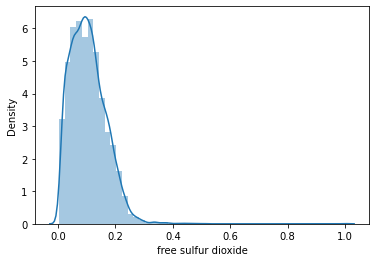

In [11]:
## value / max_value
df_temp = df.copy()
df_temp['free sulfur dioxide'] = df_temp['free sulfur dioxide'] / df_temp['free sulfur dioxide'].abs().max()
sns.distplot(df_temp['free sulfur dioxide'])

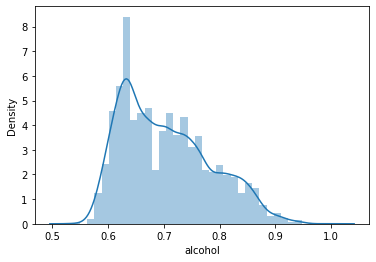

In [12]:
df_temp['alcohol'] = df_temp['alcohol'] / df_temp['alcohol'].abs().max()
sns.distplot(df_temp['alcohol'])

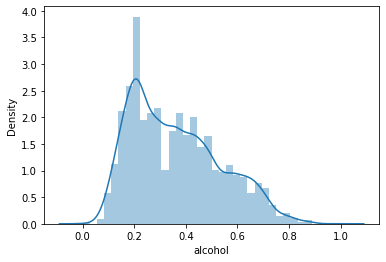

In [13]:
# (value - min) / (max - min)
df_temp = df.copy()
df_temp['alcohol'] = (df_temp['alcohol'] - df_temp['alcohol'].min()) / (df_temp['alcohol'].max() - df_temp['alcohol'].min())
sns.distplot(df_temp['alcohol'])

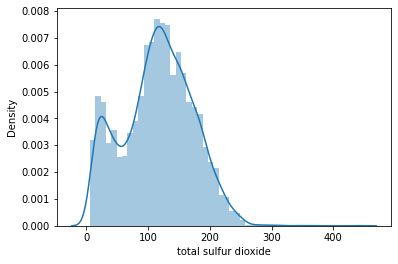

In [14]:
# original_value = scaled_value * (max-min) + min
#Log Transformation
sns.distplot(df['total sulfur dioxide'])

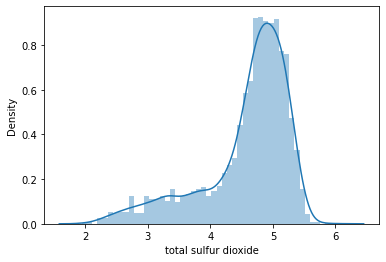

In [15]:
df_temp = df.copy()
df_temp['total sulfur dioxide'] = np.log(df_temp['total sulfur dioxide']+1)
sns.distplot(df_temp['total sulfur dioxide'])

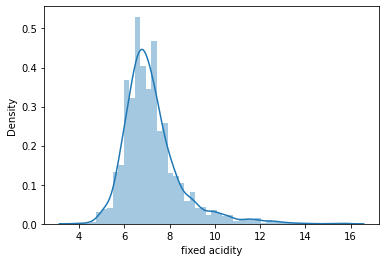

In [17]:
##Standardization of Data
## z-score method
# scaled_value = value - mean / std
# original_value = scaled_value * std + mean
sns.distplot(df['fixed acidity'])

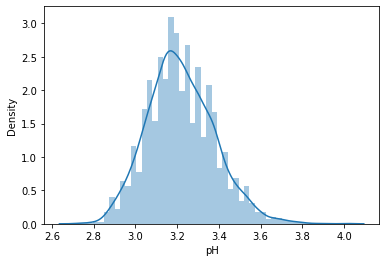

In [18]:
sns.distplot(df['pH'])

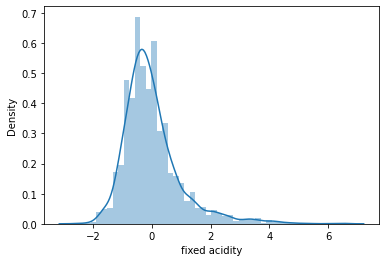

In [19]:
scaled_data = df.copy()
## apply the formula
for col in ['fixed acidity', 'pH']:
    scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()
sns.distplot(scaled_data['fixed acidity'])


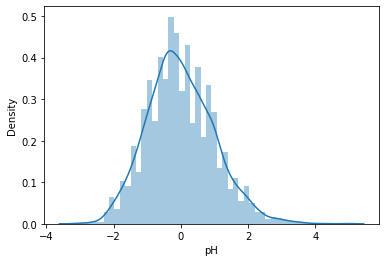

In [20]:
sns.distplot(scaled_data['pH'])

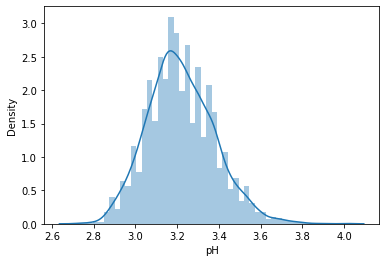

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[['pH']])
StandardScaler()
sc_data = sc.transform(df[['pH']])
sc_data = sc_data.reshape(-1)
sns.distplot(df['pH'])

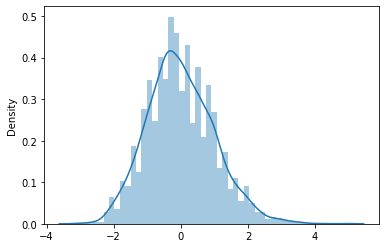

In [22]:
sns.distplot(sc_data)

In [23]:
#Detect and Remove Outliers
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,0.0,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,NaN,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


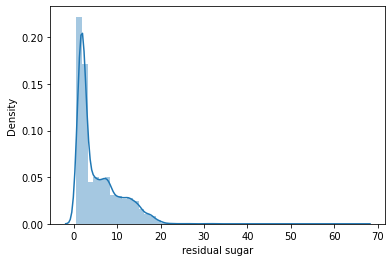

In [24]:
sns.distplot(df['residual sugar'])

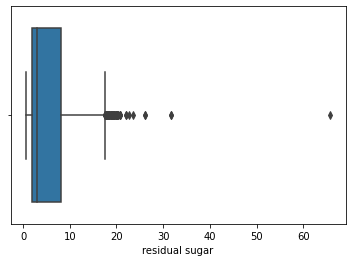

In [25]:
# to see outliers clearly
sns.boxplot(df['residual sugar'])

In [26]:
##Z-score method
# find the limits
upper_limit = df['residual sugar'].mean() + 3*df['residual sugar'].std()
lower_limit = df['residual sugar'].mean() - 3*df['residual sugar'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 19.718700632945
lower limit: -8.830047823091265


In [27]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,NaN,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
182,NaN,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,NaN,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
292,NaN,white,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5
444,NaN,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
1454,NaN,white,8.3,0.210,0.49,19.80,0.054,50.0,231.0,1.00120,2.99,0.54,9.2,5
1608,NaN,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,NaN,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,NaN,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


In [28]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6469
outliers: 28


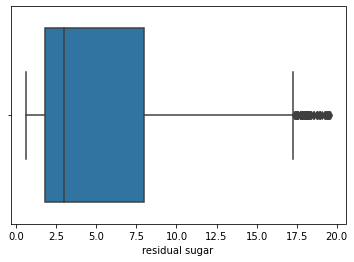

In [29]:
sns.boxplot(new_df['residual sugar'])

In [30]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>=upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<=lower_limit), 'residual sugar'] = lower_limit

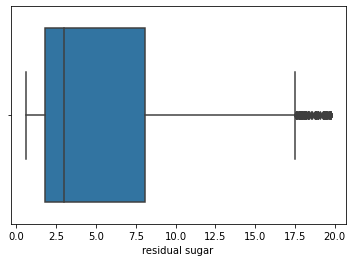

In [31]:
sns.boxplot(new_df['residual sugar'])

In [32]:
len(new_df)

6497

In [33]:
##IQR method
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(1.8, 8.1, 6.3)

In [34]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-7.6499999999999995, 17.549999999999997)

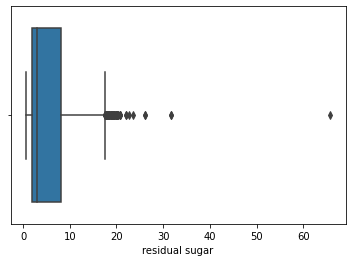

In [35]:
sns.boxplot(df['residual sugar'])

In [36]:
# find the outliers
df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,NaN,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,NaN,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
38,NaN,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
39,NaN,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,NaN,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4694,NaN,white,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7
4748,NaN,white,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5
4749,NaN,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6


In [37]:
# trimming - delete the outlier data
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 6497
after removing outliers: 6377
outliers: 120


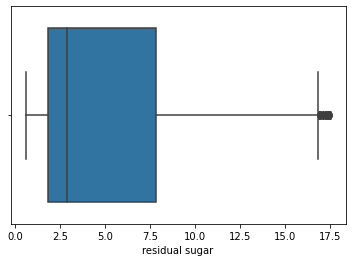

In [38]:
sns.boxplot(new_df['residual sugar'])

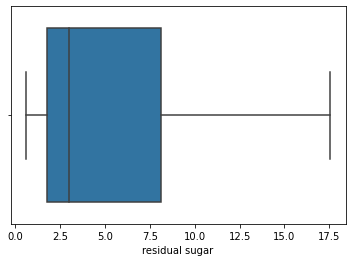

In [39]:
# capping - change the outlier values to upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['residual sugar']>upper_limit), 'residual sugar'] = upper_limit
new_df.loc[(new_df['residual sugar']<lower_limit), 'residual sugar'] = lower_limit
sns.boxplot(new_df['residual sugar'])